### Librabiers import 

In [30]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import helpers
import matplotlib.image as mpimg 

%matplotlib inline 

### Load dataset 

We will load trainindg images dataset as a array of images with corresponding labels.<br>
Later on we'll need to resize them to similar shape and convert categorical data to numerical.

In [65]:
# Image data directories
image_dir_training = "training/"
image_dir_test = "test/"

In [66]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [166]:
IMAGE_LIST[0][1]

'day'

### Standardize output

Lets create a class for **input standartization**.<br>
Note, we need to standardize **2 objects**:
- image;
- its label (convert categorical to numerical).

We will: 
- resize image with **shape (600x1100 px)**;
- convert **day to 1 and night to 0**;
- output a **list of standardised** images.

In [182]:
class Standardize():
    def __init__(self):
        # self.image_list = image_list
        self.standardized_list = []
        self.numerical_value = 0
    
    # initialize the function 
    def standardize_input(self, image_list):
        for item in image_list:
            # image has index 0
            # label has index 1
            image = item[0]
            label = item[1]
            image = np.copy(image)
            label = np.copy(label)
            # start with image resize
            image_std = cv2.resize(image, (1100, 600))
            label_binary = self.numerical_value if label == 'night' else 1
            self.standardized_list.append((image_std, label_binary))
        return self.standardized_list

**Important:** when we refer to **self** argument, so the object itself, we need to initialize it, **using brackets ()**, like: <br>
`s1 = Standardize()`

In [184]:
s1 = Standardize()
IMAGE_LIST_stand = s1.standardize_input(IMAGE_LIST)

In [171]:
print("Length of standardized images dataset:",len(IMAGE_LIST_stand))
print("Length of original images dataset:",len(IMAGE_LIST))

Length of standardized images dataset: 6
Length of original images dataset: 6


Write the same class, but in **static method** way.

In [169]:
class Standardize():
    
    def standardize_input(image_list):     
        standardized_list = []
        numerical_value = 0
        for item in image_list:
            # image has index 0
            # label has index 1
            image = item[0]
            label = item[1]
            image = np.copy(image)
            label = np.copy(label)
            # start with image resize
            image_std = cv2.resize(image, (1100, 600))
            # then, converting categorical labels 
            label_binary = numerical_value if label == 'night' else 1
            standardized_list.append((image_std, label_binary))
        return standardized_list

### Visualize original and standardized images

Standardized image size.

1


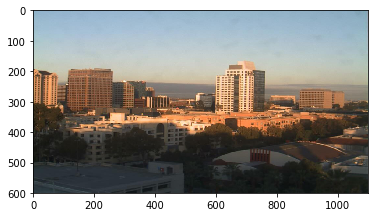

In [152]:
example_img = IMAGE_LIST_stand[0][0]
example_img = np.copy(example_img)

plt.imshow(example_img)
print(IMAGE_LIST_stand[0][1])